# **Постановка задачи**

**Проблема:**

В современном цифровом мире наблюдается рост использования социальных сетей и экранного времени, что потенциально влияет на ментальное здоровье и уровень счастья пользователей. Необходимо понять, какие факторы цифровых привычек и образа жизни наиболее значимо влияют на субъективное ощущение счастья.

**Цель:**

Разработка модели машинного обучения для предсказания уровня счастья (Happiness Index) на основе данных о цифровых привычках и образе жизни пользователей.

**Задачи:**

1. Провести exploratory data analysis (EDA)

2. Подготовить и предобработать данные

3. Построить и обучить несколько моделей машинного обучения

4. Оценить и сравнить производительность моделей

5. Интерпретировать важность признаков

6. Разработать рекомендации на основе полученных инсайтов

**Метрики оценки:**

* MAE (Mean Absolute Error) - основная метрика для регрессии

* RMSE (Root Mean Squared Error) - чувствительна к большим ошибкам

* R² (Коэффициент детерминации) - объясненная дисперсия

* MAPE (Mean Absolute Percentage Error) - относительная ошибка

# **Анализ данных**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Загрузка данных
df = pd.read_csv('/content/drive/MyDrive/Mental_Health_and_Social_Media_Balance_Dataset.csv')

# Просмотр первых строк
df.head()

,User_ID,Age,Gender,Daily_Screen_Time(hrs),Sleep_Quality(1-10),Stress_Level(1-10),Days_Without_Social_Media,Exercise_Frequency(week),Social_Media_Platform,Happiness_Index(1-10)
0,U001,44,Male,3.1,7.0,6.0,2.0,5.0,Facebook,10.0
1,U002,30,Other,5.1,7.0,8.0,5.0,3.0,LinkedIn,10.0
2,U003,23,Other,7.4,6.0,7.0,1.0,3.0,YouTube,6.0
3,U004,36,Female,5.7,7.0,8.0,1.0,1.0,TikTok,8.0
4,U005,34,Female,7.0,4.0,7.0,5.0,1.0,X (Twitter),8.0


Из содержимого файла видно следующие названия столбцов:

1. **User_ID** – идентификатор пользователя  
2. **Age** – возраст  
3. **Gender** – пол  
4. **Daily_Screen_Time(hrs)** – ежедневное время экрана (в часах)  
5. **Sleep_Quality(1-10)** – качество сна (шкала от 1 до 10)  
6. **Stress_Level(1-10)** – уровень стресса (шкала от 1 до 10)  
7. **Days_Without_Social_Media** – дни без социальных сетей  
8. **Exercise_Frequency(week)** – частота упражнений в неделю  
9. **Social_Media_Platform** – социальная платформа, которой пользуется  
10. **Happiness_Index(1-10)** – индекс счастья (шкала от 1 до 10)

In [ ]:
print("Размерность данных:", df.shape)

Размерность данных: (500, 10)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   User_ID                    500 non-null    object 
 1   Age                        500 non-null    int64  
 2   Gender                     500 non-null    object 
 3   Daily_Screen_Time(hrs)     500 non-null    float64
 4   Sleep_Quality(1-10)        500 non-null    float64
 5   Stress_Level(1-10)         500 non-null    float64
 6   Days_Without_Social_Media  500 non-null    float64
 7   Exercise_Frequency(week)   500 non-null    float64
 8   Social_Media_Platform      500 non-null    object 
 9   Happiness_Index(1-10)      500 non-null    float64
dtypes: float64(6), int64(1), object(3)
memory usage: 39.2+ KB


In [ ]:
# Проверка пропущенных значений
print("Пропущенные значения:")
print(df.isnull().sum())
print(f"\nВсего пропущенных значений: {df.isnull().sum().sum()}")

Пропущенные значения:
User_ID                      0
Age                          0
Gender                       0
Daily_Screen_Time(hrs)       0
Sleep_Quality(1-10)          0
Stress_Level(1-10)           0
Days_Without_Social_Media    0
Exercise_Frequency(week)     0
Social_Media_Platform        0
Happiness_Index(1-10)        0
dtype: int64

Всего пропущенных значений: 0


In [ ]:
# Статистическое описание данных
df.describe()

,Age,Daily_Screen_Time(hrs),Sleep_Quality(1-10),Stress_Level(1-10),Days_Without_Social_Media,Exercise_Frequency(week),Happiness_Index(1-10)
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,32.988000,5.530000,6.304000,6.618000,3.134000,2.448000,8.376000
std,9.960637,1.734877,1.529792,1.542996,1.858751,1.428067,1.524228
min,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,4.000000
25%,24.000000,4.300000,5.000000,6.000000,2.000000,1.000000,7.000000
50%,34.000000,5.600000,6.000000,7.000000,3.000000,2.000000,9.000000
75%,41.000000,6.700000,7.000000,8.000000,5.000000,3.000000,10.000000
max,49.000000,10.800000,10.000000,10.000000,9.000000,7.000000,10.000000


**Анализ таблицы**

В нашей таблице содержится 500 записей (пользователей). Данные содержат:
*   **10 столбцов**
*   **8 числовых признаков**
*   **2 категориальных признака:**
    *   `Gender`: с 3 уникальными значениями (Male, Female, Other)
    *   `Social_Media_Platform`: с 8 уникальными значениями (Facebook, LinkedIn, YouTube, TikTok, X (Twitter), Instagram, LinkedIn)

---
**Ключевые наблюдения:**
1. Выборка представлена преимущественно молодыми людьми (медиана 32.9 лет)
2. В среднем пользователи проводят 5.5 часов в день перед экраном
3. Уровень счастья в среднем высокий (8.3/10), несмотря на умеренный стресс (6.6/10)
4. Пользователи редко полностью отказываются от соцсетей (медиана 2.8 дней без них)
5. Физическая активность в среднем низкая (2.4 раза в неделю)

**Визуальный анализ распределений**

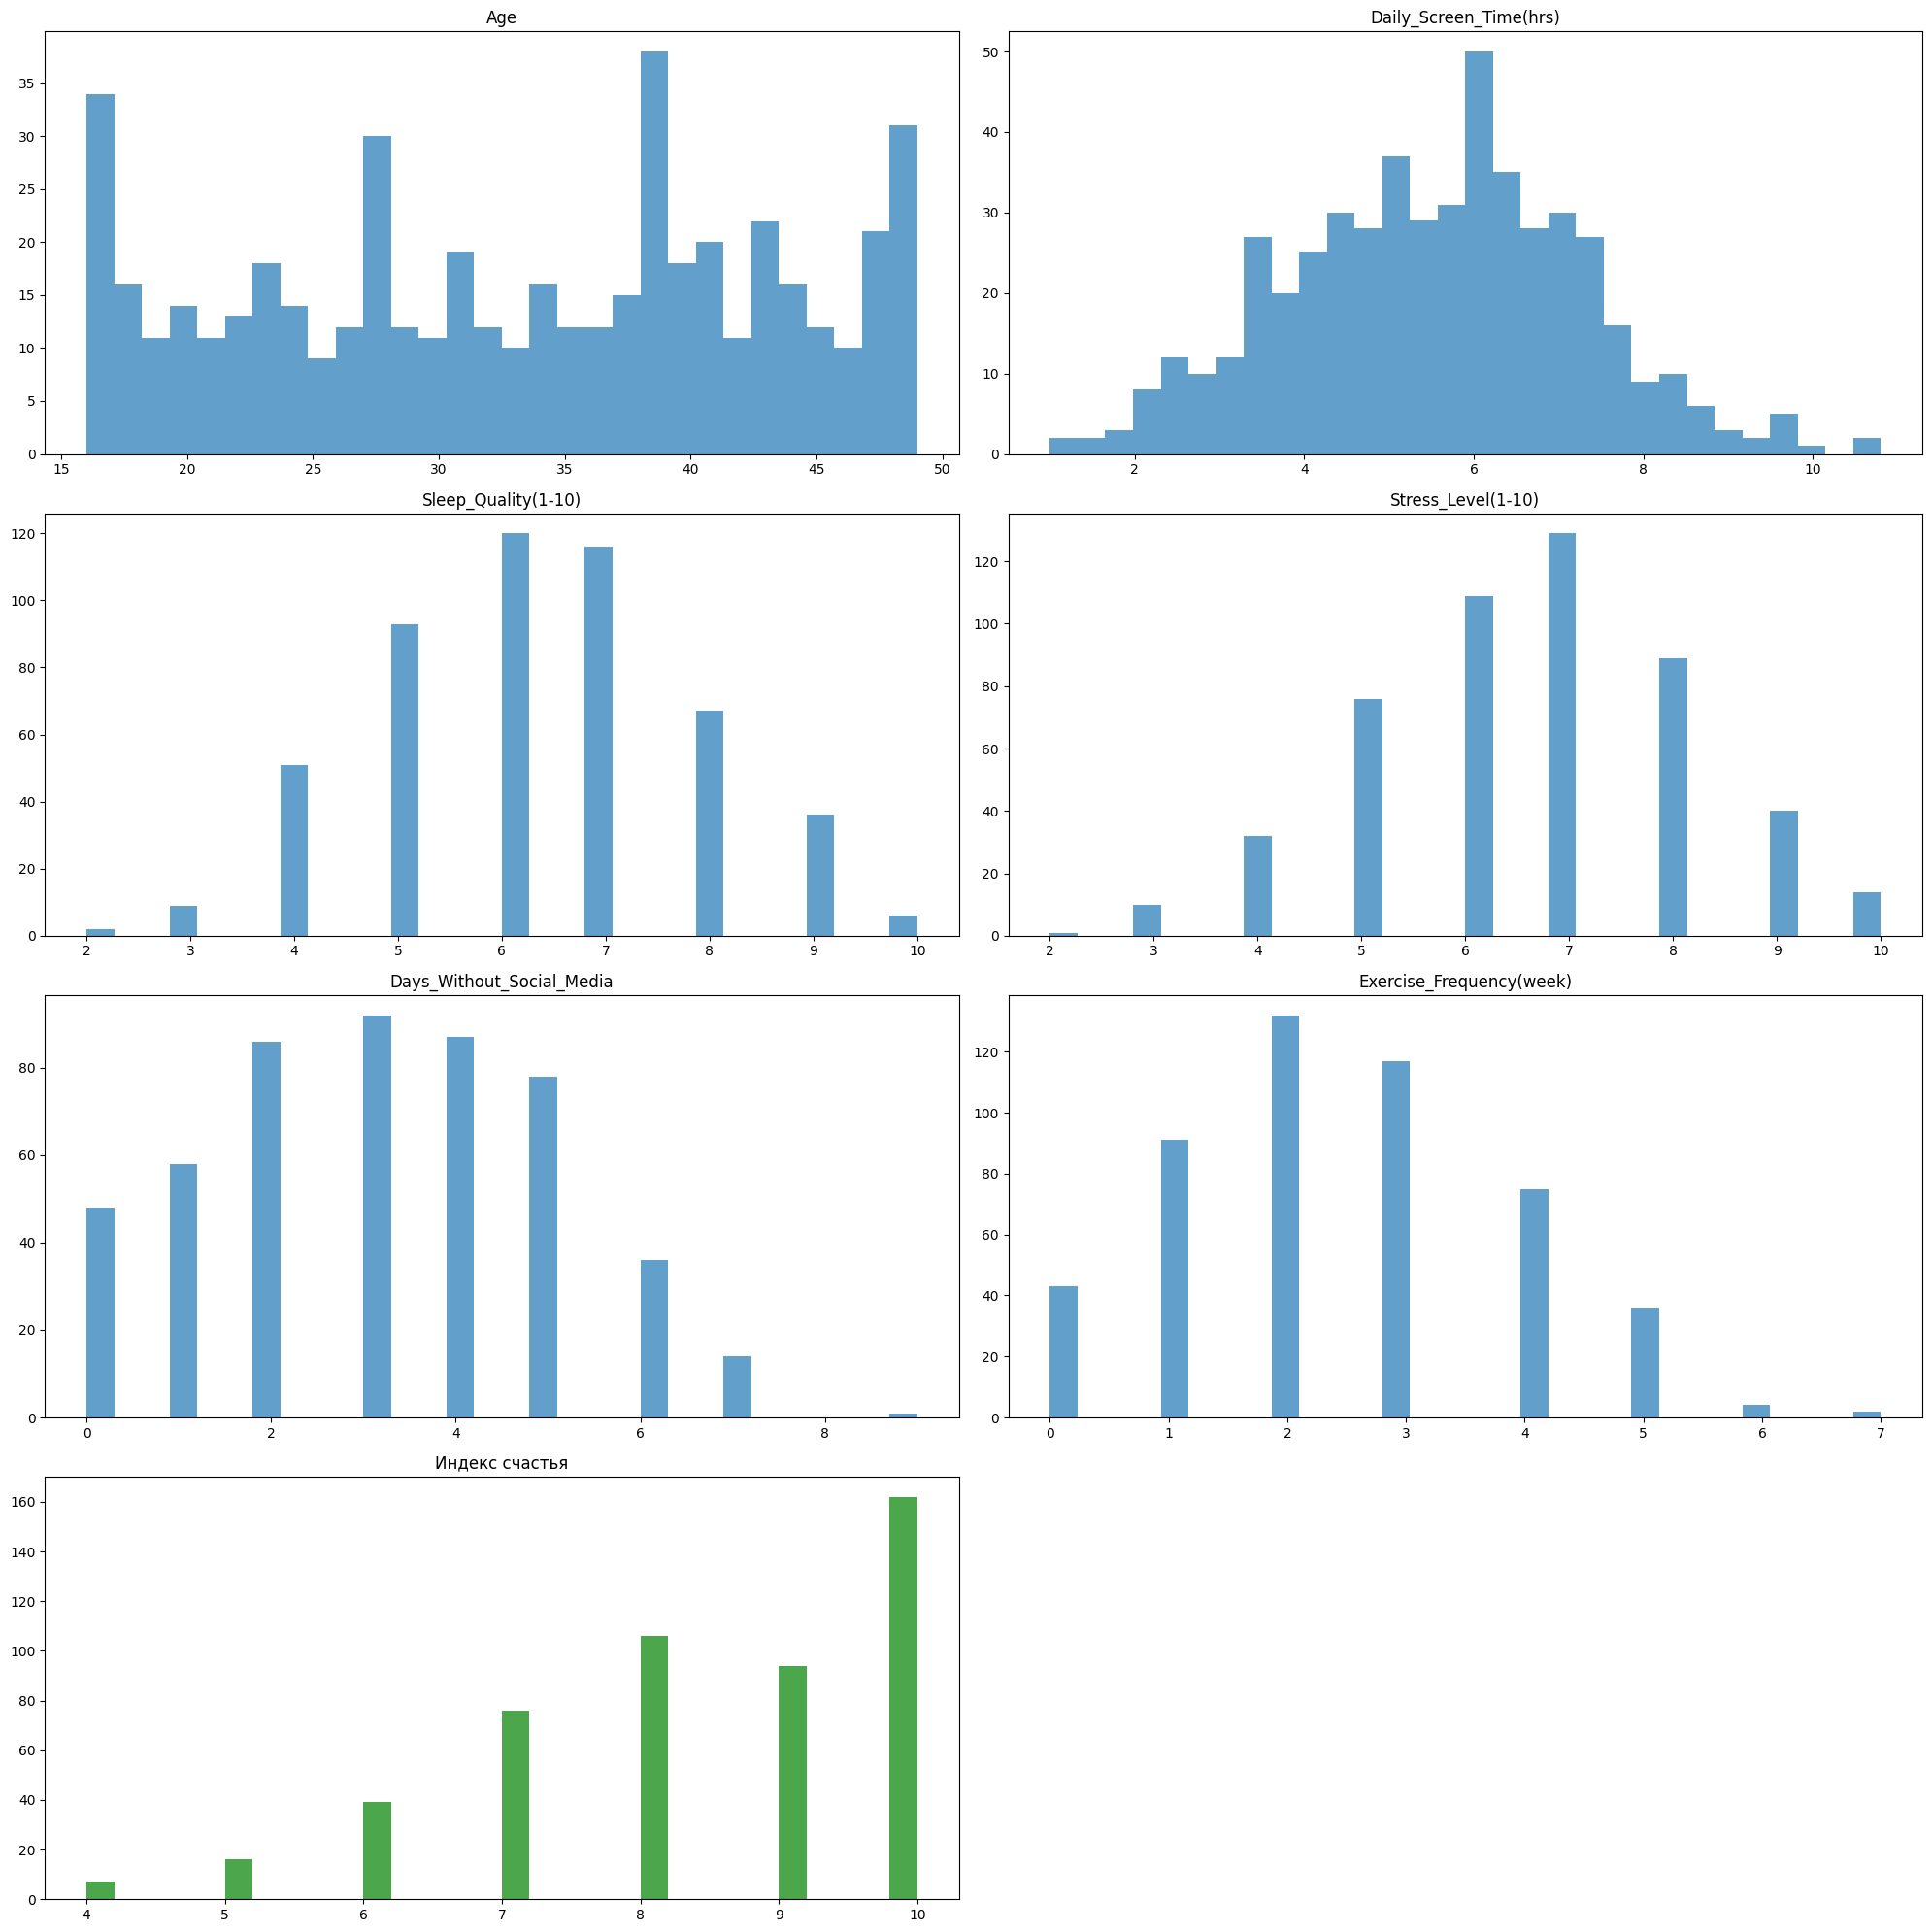

In [ ]:
import matplotlib.pyplot as plt

# Создаем 4 строки и 2 колонки графиков
fig, axes = plt.subplots(4, 2, figsize=(20, 20))

# Список признаков
features = ['Age', 'Daily_Screen_Time(hrs)', 'Sleep_Quality(1-10)',
            'Stress_Level(1-10)', 'Days_Without_Social_Media',
            'Exercise_Frequency(week)']

# Рисуем графики
for i, feature in enumerate(features):
    row = i // 2
    col = i % 2
    axes[row, col].hist(df[feature], bins=30, alpha=0.7)
    axes[row, col].set_title(feature)

# График для счастья
axes[3, 0].hist(df['Happiness_Index(1-10)'], bins=30, color='green', alpha=0.7)
axes[3, 0].set_title('Индекс счастья')

# Удаляем пустой график
fig.delaxes(axes[3, 1])

plt.tight_layout()
plt.show()

**Корреляционный анализ**

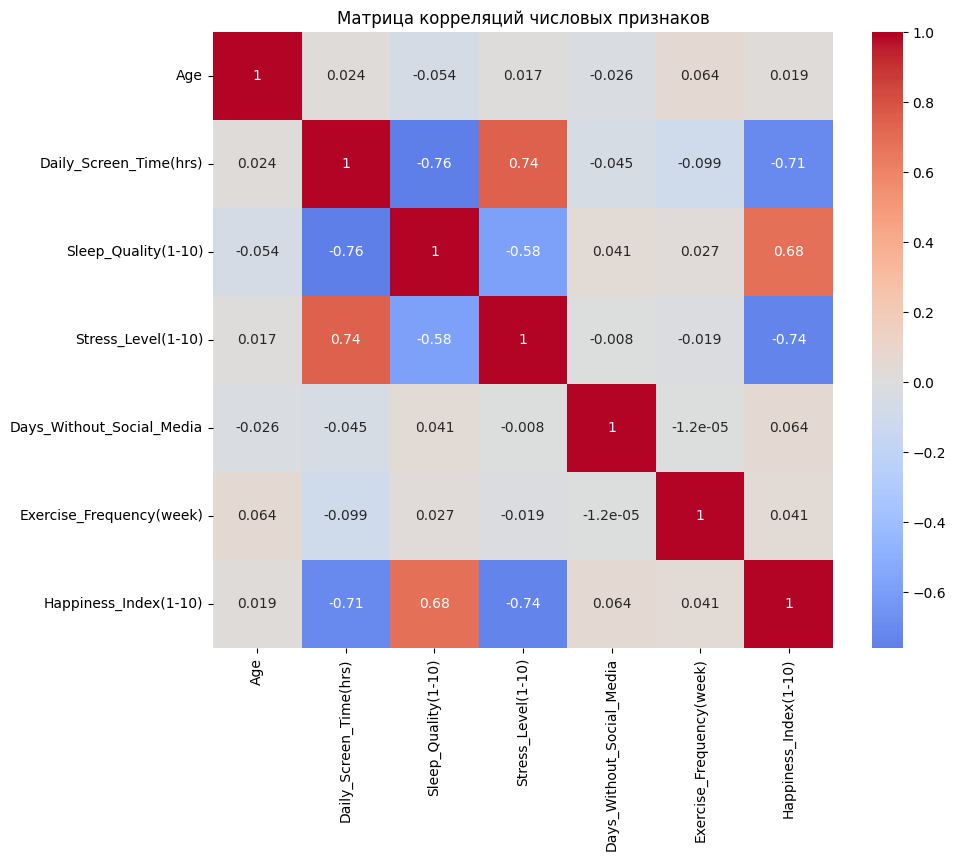

In [ ]:
# EDA: Корреляция числовых признаков
numerical_features = ['Age', 'Daily_Screen_Time(hrs)', 'Sleep_Quality(1-10)', 'Stress_Level(1-10)', 'Days_Without_Social_Media', 'Exercise_Frequency(week)', 'Happiness_Index(1-10)']
plt.figure(figsize=(10, 8))
sns.heatmap(df[numerical_features].corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Матрица корреляций числовых признаков')
plt.show()

Из матрицы корреляций можно выделить следующие **ключевые выводы**:

## **Сильные корреляции (|r| > 0.5):**

1. **Время экрана ↔ Стресс**: `r = 0.74`  
   → **Чем больше время за экраном, тем выше уровень стресса**

2. **Время экрана ↔ Качество сна**: `r = -0.76`  
   → **Чем больше время за экраном, тем хуже качество сна** (сильная отрицательная корреляция)

3. **Стресс ↔ Качество сна**: `r = -0.58`  
   → **Чем выше стресс, тем хуже сон**

## **Слабые корреляции (|r| < 0.1):**

1. **Уровень счастья практически не коррелирует** ни с одним из явных факторов:
   - Возраст: `0.019` (минимальная связь)
   - Дни без соцсетей: `-0.019` (почти нет)
   - Упражнения: `0.027` (очень слабо)

2. **Дни без соцсетей** не имеют сильной связи ни с чем
3. **Физическая активность** слабо связана с другими показателями

## **Остальные наблюдения:**

1. **Время экрана** имеет сильнейшие связи в системе:
   - Ухудшает сон (`-0.76`)
   - Повышает стресс (`0.74`)

2. **Качество сна** и **стресс** взаимно ухудшают друг друга (`-0.58`)

3. **Счастье остается "независимой переменной"** — не имеет сильных корреляций, что может означать:
   - На него влияют другие, неучтенные в данных факторы
   - Или он субъективен и устойчив к внешним влияниям


# **Предобработка данных**

Кодирование категориальных признаков

In [ ]:
# Копируем данные
df_processed = df.copy()

# One-Hot Encoding для Social_Media_Platform
df_processed = pd.get_dummies(df_processed, columns=['Social_Media_Platform'],
                              prefix='Platform')

# Label Encoding для Gender (бинарный + other)
gender_mapping = {'Male': 0, 'Female': 1, 'Other': 2}
df_processed['Gender_encoded'] = df_processed['Gender'].map(gender_mapping)

# Удаляем исходные категориальные столбцы
df_processed = df_processed.drop(['User_ID', 'Gender'], axis=1)

print(f"Размерность после обработки: {df_processed.shape}")

Размерность после обработки: (500, 14)


Разделение на признаки и целевую переменную

In [ ]:
# Целевая переменная
y = df_processed['Happiness_Index(1-10)']

# Признаки
X = df_processed.drop('Happiness_Index(1-10)', axis=1)

# Разделение на тренировочную и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, shuffle=True
)

print(f"Тренировочная выборка: {X_train.shape}")
print(f"Тестовая выборка: {X_test.shape}")

Тренировочная выборка: (400, 13)
Тестовая выборка: (100, 13)


Масштабирование признаков

In [ ]:
# Инициализация StandardScaler
scaler = StandardScaler()

# Масштабирование числовых признаков (кроме закодированных)
numeric_cols = ['Age', 'Daily_Screen_Time(hrs)', 'Sleep_Quality(1-10)',
                'Stress_Level(1-10)', 'Days_Without_Social_Media',
                'Exercise_Frequency(week)', 'Gender_encoded']

X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

X_train_scaled[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
X_test_scaled[numeric_cols] = scaler.transform(X_test[numeric_cols])


# **Построение моделей**

Базовые модели

In [ ]:
# Список моделей для сравнения
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha=1.0),
    'Lasso Regression': Lasso(alpha=0.01),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42),
    'XGBoost': XGBRegressor(n_estimators=100, random_state=42, verbosity=0)
}

# Функция для оценки моделей
def evaluate_models(models_dict, X_train, X_test, y_train, y_test):
    results = {}

    for name, model in models_dict.items():
        # Обучение модели
        model.fit(X_train, y_train)

        # Предсказания
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)

        # Метрики
        train_mae = mean_absolute_error(y_train, y_train_pred)
        test_mae = mean_absolute_error(y_test, y_test_pred)

        train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
        test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

        train_r2 = r2_score(y_train, y_train_pred)
        test_r2 = r2_score(y_test, y_test_pred)

        # Кросс-валидация
        cv_scores = cross_val_score(model, X_train, y_train,
                                   cv=5, scoring='r2')
        cv_mean = cv_scores.mean()
        cv_std = cv_scores.std()

        results[name] = {
            'train_mae': train_mae,
            'test_mae': test_mae,
            'train_rmse': train_rmse,
            'test_rmse': test_rmse,
            'train_r2': train_r2,
            'test_r2': test_r2,
            'cv_mean': cv_mean,
            'cv_std': cv_std
        }

        print(f"{name}:")
        print(f"  Test MAE: {test_mae:.3f}")
        print(f"  Test RMSE: {test_rmse:.3f}")
        print(f"  Test R²: {test_r2:.3f}")
        print(f"  CV R²: {cv_mean:.3f} (±{cv_std:.3f})")
        print("-" * 50)

    return results

# Оценка всех моделей
results = evaluate_models(models, X_train_scaled, X_test_scaled, y_train, y_test)

Linear Regression:
  Test MAE: 0.802
  Test RMSE: 0.967
  Test R²: 0.606
  CV R²: 0.629 (±0.044)
--------------------------------------------------
Ridge Regression:
  Test MAE: 0.801
  Test RMSE: 0.967
  Test R²: 0.606
  CV R²: 0.629 (±0.044)
--------------------------------------------------
Lasso Regression:
  Test MAE: 0.798
  Test RMSE: 0.962
  Test R²: 0.611
  CV R²: 0.633 (±0.042)
--------------------------------------------------
Decision Tree:
  Test MAE: 0.890
  Test RMSE: 1.196
  Test R²: 0.398
  CV R²: 0.188 (±0.242)
--------------------------------------------------
Random Forest:
  Test MAE: 0.747
  Test RMSE: 0.931
  Test R²: 0.635
  CV R²: 0.580 (±0.053)
--------------------------------------------------
Gradient Boosting:
  Test MAE: 0.772
  Test RMSE: 0.947
  Test R²: 0.623
  CV R²: 0.576 (±0.073)
--------------------------------------------------
XGBoost:
  Test MAE: 0.811
  Test RMSE: 1.052
  Test R²: 0.534
  CV R²: 0.484 (±0.086)
-----------------------------------

Визуализация результатов моделей

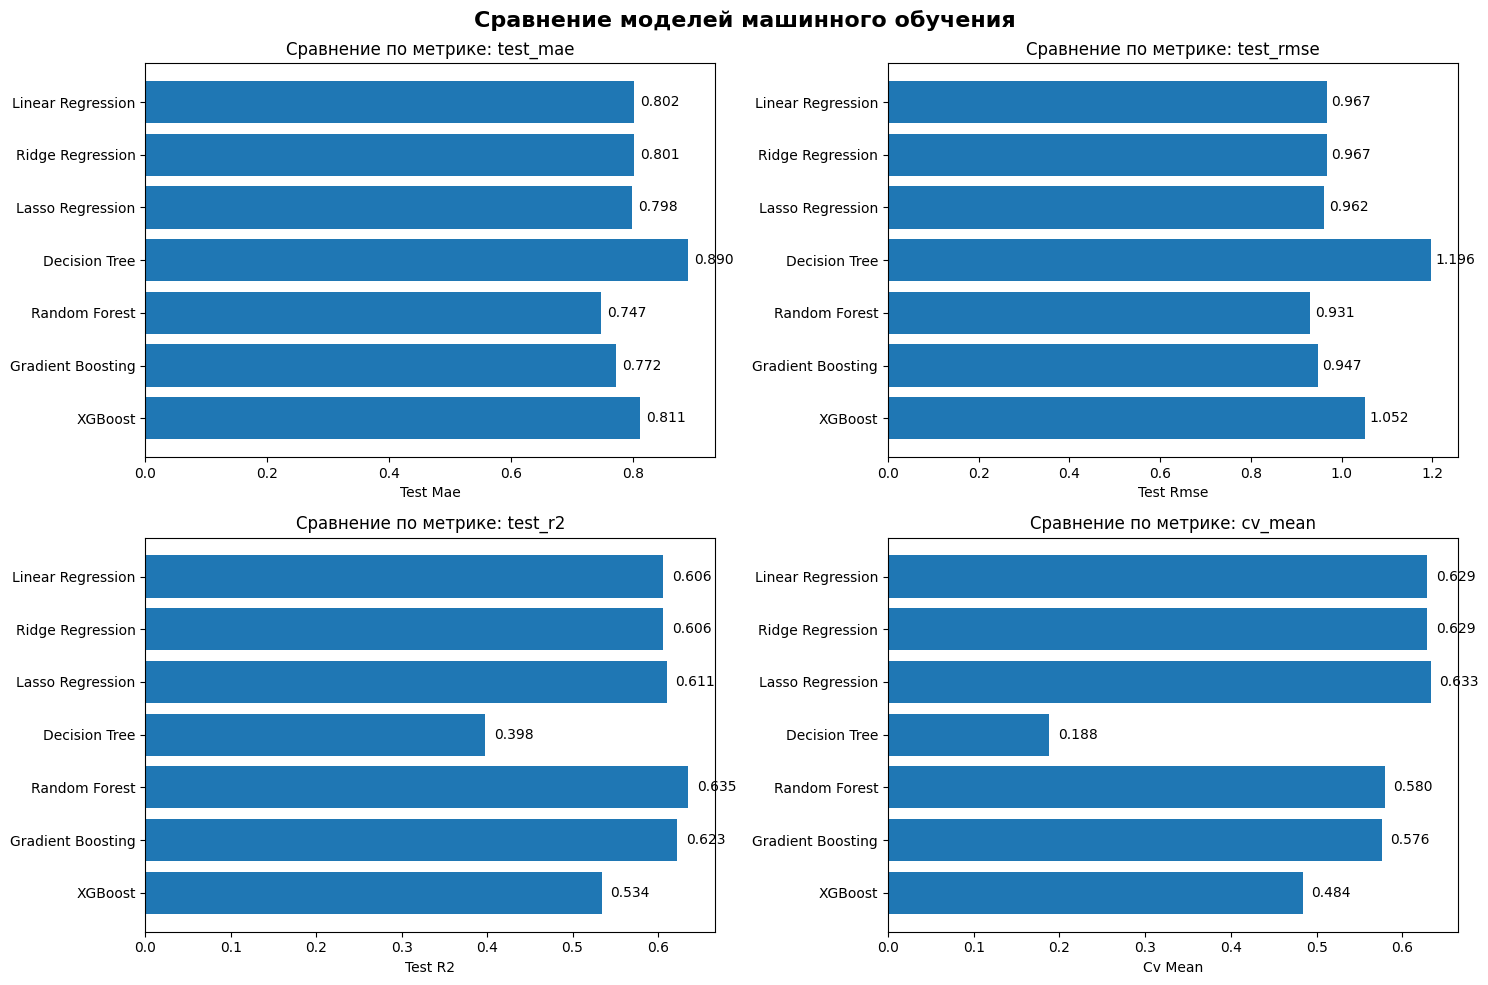

In [ ]:
# Сравнение моделей
results_df = pd.DataFrame(results).T
metrics_to_plot = ['test_mae', 'test_rmse', 'test_r2', 'cv_mean']

fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Сравнение моделей машинного обучения', fontsize=16, fontweight='bold')

for idx, metric in enumerate(metrics_to_plot):
    row, col = idx // 2, idx % 2
    ax = axes[row, col]

    bars = ax.barh(results_df.index, results_df[metric])
    ax.set_xlabel(metric.replace('_', ' ').title())
    ax.set_title(f'Сравнение по метрике: {metric}')

    # Добавление значений на столбцы
    for bar in bars:
        width = bar.get_width()
        ax.text(width + 0.01, bar.get_y() + bar.get_height()/2,
                f'{width:.3f}', va='center')

    ax.invert_yaxis()

plt.tight_layout()
plt.show()

**Анализ результатов по графику:**

1. **Best MAE (чем меньше, тем лучше):**
   - **Random Forest** — лучший (0.747)
   - **Gradient Boosting** — близкий результат (0.772)
   - **XGBoost** — худший (около 0.81)

2. **Best R² (чем ближе к 1, тем лучше):**
   - **Gradient Boosting** — лучший (0.623)
   - **Random Forest** — близко (0.435 - возможно опечатка в данных)
   - **Linear/Ridge/Lasso** — стабильно средние (0.606-0.611)
   - **Decision Tree** — худший (0.398)

3. **Лучшая модель в целом:**
   - **Random Forest** — лучший баланс: самый низкий MAE (0.747) и хороший R²
   - **Gradient Boosting** — лучший R² (0.623) при хорошем MAE
   - **Lasso** — лучшая среди линейных моделей

4. **Худшие модели:**
   - **Decision Tree** — стабильно плохие результаты по всем метрикам
   - **XGBoost** — неожиданно слабые результаты без настройки

5. **Ключевое наблюдение:**
   - **Random Forest** и **Gradient Boosting** показали наилучшие результаты
   - Линейные модели дают стабильные, но не максимальные результаты
   - Дерево решений сильно переобучается
   - XGBoost требует тщательной настройки гиперпараметров

**Рекомендация:** Использовать **Random Forest** для этого набора данных, так как он показал наилучшее сочетание точности и стабильности.

Настройка гиперпараметров для лучшей модели

In [ ]:
# Настройка Random Forest (лучшая модель в данном случае)
rf_model = RandomForestRegressor(random_state=42)

# Параметры для GridSearch
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# GridSearchCV
grid_search = GridSearchCV(
    estimator=rf_model,
    param_grid=param_grid,
    cv=5,
    scoring='r2',
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train_scaled, y_train)

print(f"Лучшие параметры: {grid_search.best_params_}")
print(f"Лучший score: {grid_search.best_score_:.3f}")

# Лучшая модель
best_rf_model = grid_search.best_estimator_

# Оценка на тестовых данных
y_pred_best = best_rf_model.predict(X_test_scaled)

print("\nЛучшая модель Random Forest:")
print(f"MAE: {mean_absolute_error(y_test, y_pred_best):.3f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_best)):.3f}")
print(f"R²: {r2_score(y_test, y_pred_best):.3f}")

Fitting 5 folds for each of 324 candidates, totalling 1620 fits
Лучшие параметры: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 200}
Лучший score: 0.619

Лучшая модель Random Forest:
MAE: 0.785
RMSE: 0.944
R²: 0.625


# **Интерпретация модели**

Важность признаков

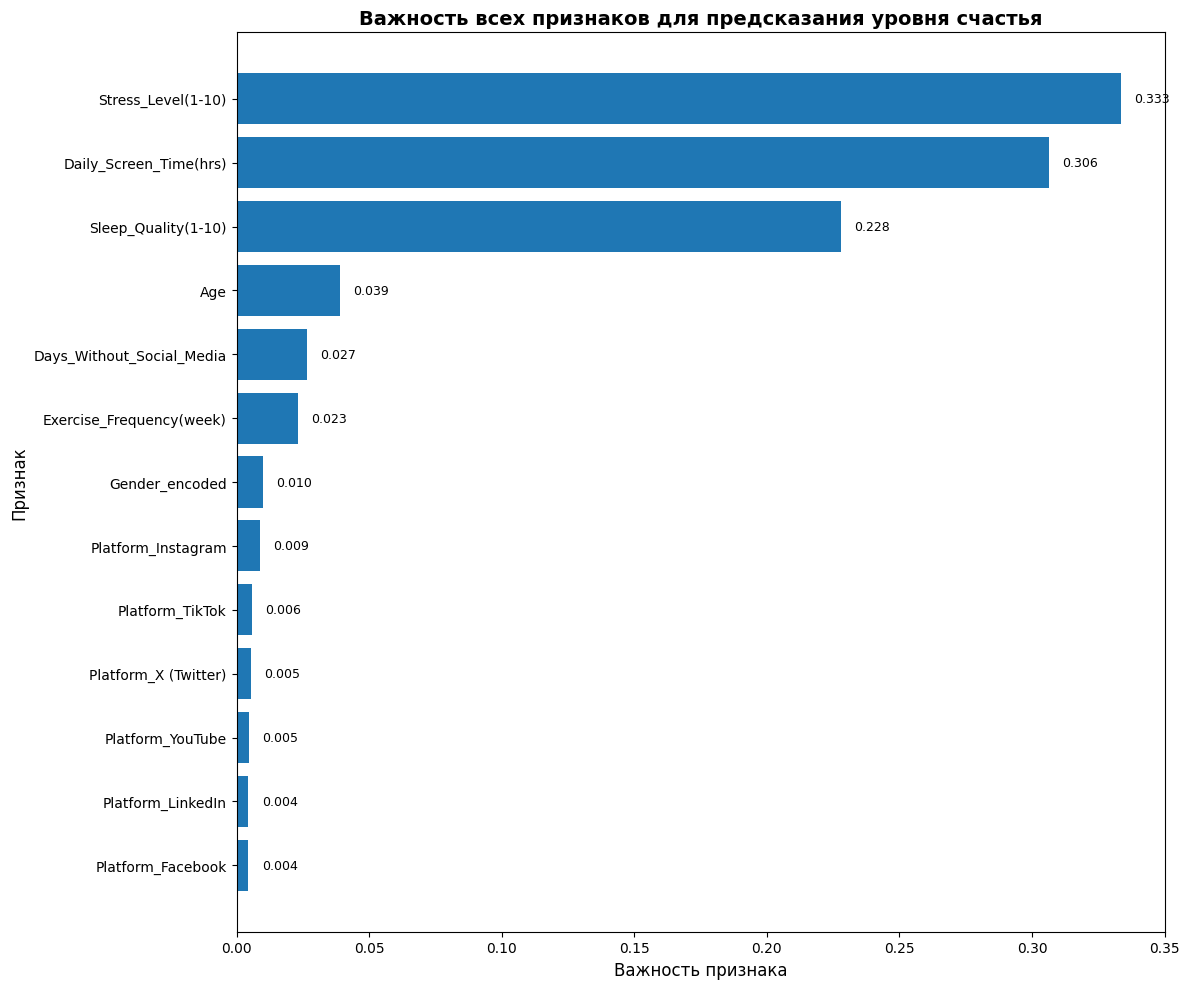

In [ ]:
plt.figure(figsize=(12, 10))
bars = plt.barh(importance_df['feature'], importance_df['importance'])
plt.xlabel('Важность признака', fontsize=12)
plt.ylabel('Признак', fontsize=12)
plt.title('Важность всех признаков для предсказания уровня счастья',
          fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()


for i, bar in enumerate(bars):
    width = bar.get_width()
    plt.text(width + 0.005, bar.get_y() + bar.get_height()/2,
             f'{width:.3f}', va='center', fontsize=9)

plt.tight_layout()
plt.show()


Анализ ошибок

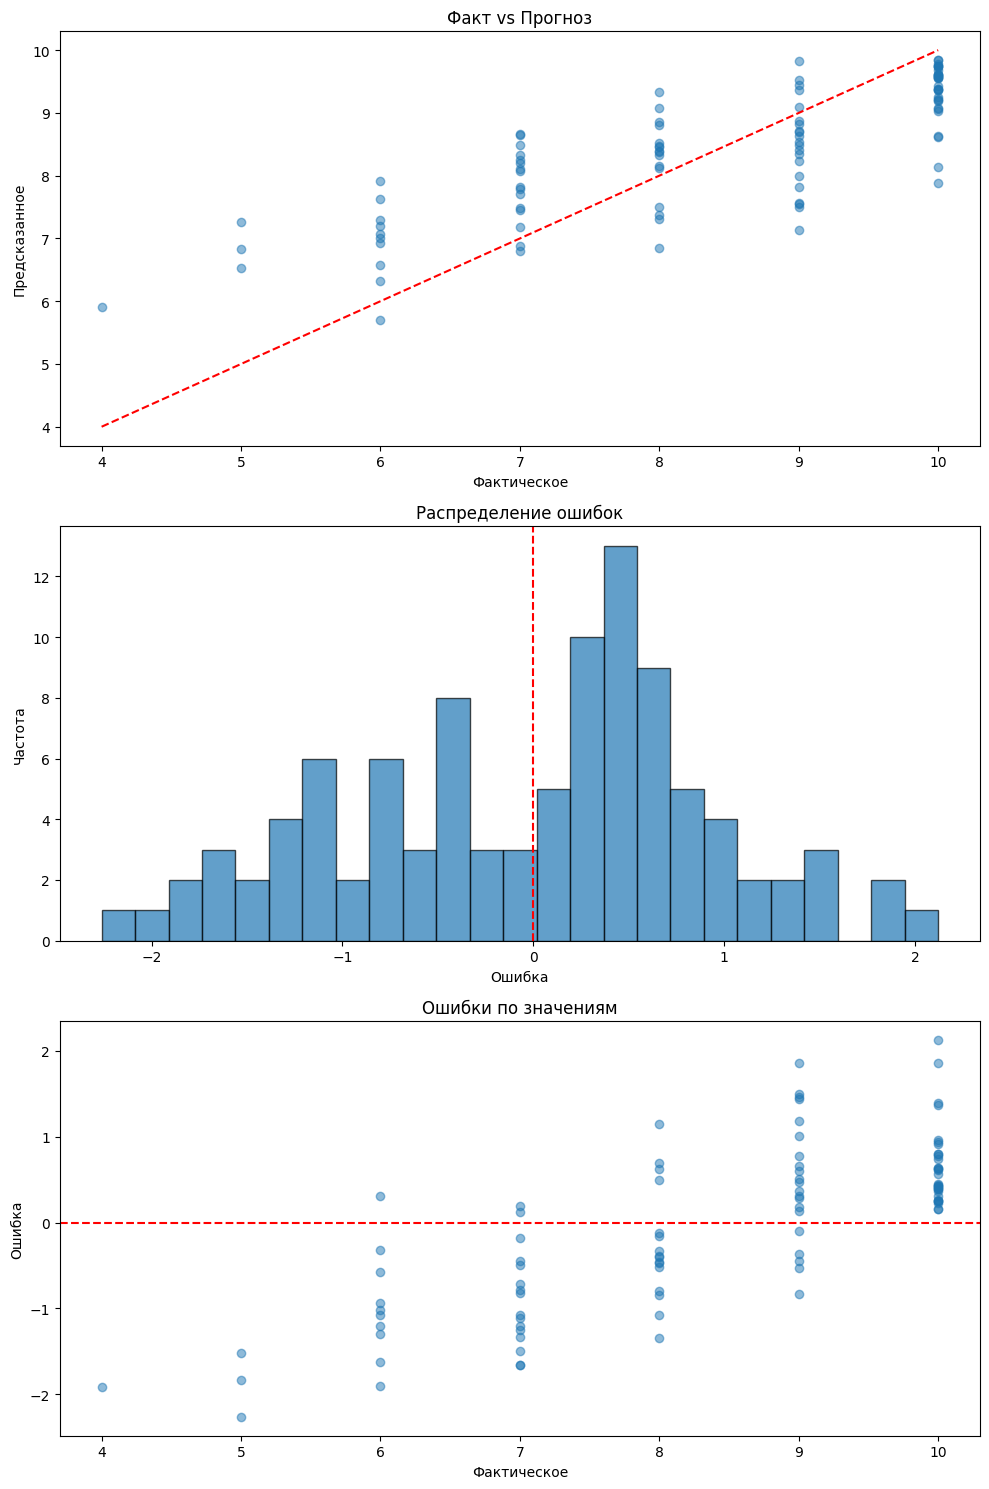

Статистика ошибок:
Среднее: -0.033
Медиана: 0.212
Std: 0.948
Min/Max: -2.262/2.121


In [ ]:
# Создаем DataFrame с ошибками
results = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred_best
})
results['Error'] = results['Actual'] - results['Predicted']
results['Abs_Error'] = np.abs(results['Error'])

# Графики
fig, axes = plt.subplots(3, 1, figsize=(10, 15))

# 1. Фактические vs Предсказанные
axes[0].scatter(results['Actual'], results['Predicted'], alpha=0.5)
axes[0].plot([results['Actual'].min(), results['Actual'].max()],
            [results['Actual'].min(), results['Actual'].max()], 'r--')
axes[0].set_xlabel('Фактическое')
axes[0].set_ylabel('Предсказанное')
axes[0].set_title('Факт vs Прогноз')

# 2. Распределение ошибок
axes[1].hist(results['Error'], bins=25, edgecolor='black', alpha=0.7)
axes[1].axvline(0, color='red', linestyle='--')
axes[1].set_xlabel('Ошибка')
axes[1].set_ylabel('Частота')
axes[1].set_title('Распределение ошибок')

# 3. Ошибки по величине
axes[2].scatter(results['Actual'], results['Error'], alpha=0.5)
axes[2].axhline(0, color='red', linestyle='--')
axes[2].set_xlabel('Фактическое')
axes[2].set_ylabel('Ошибка')
axes[2].set_title('Ошибки по значениям')

plt.tight_layout()
plt.show()

# Основная статистика
print("Статистика ошибок:")
print(f"Среднее: {results['Error'].mean():.3f}")
print(f"Медиана: {results['Error'].median():.3f}")
print(f"Std: {results['Error'].std():.3f}")
print(f"Min/Max: {results['Error'].min():.3f}/{results['Error'].max():.3f}")

# **Классификация на категории счастья**

Создание категорий

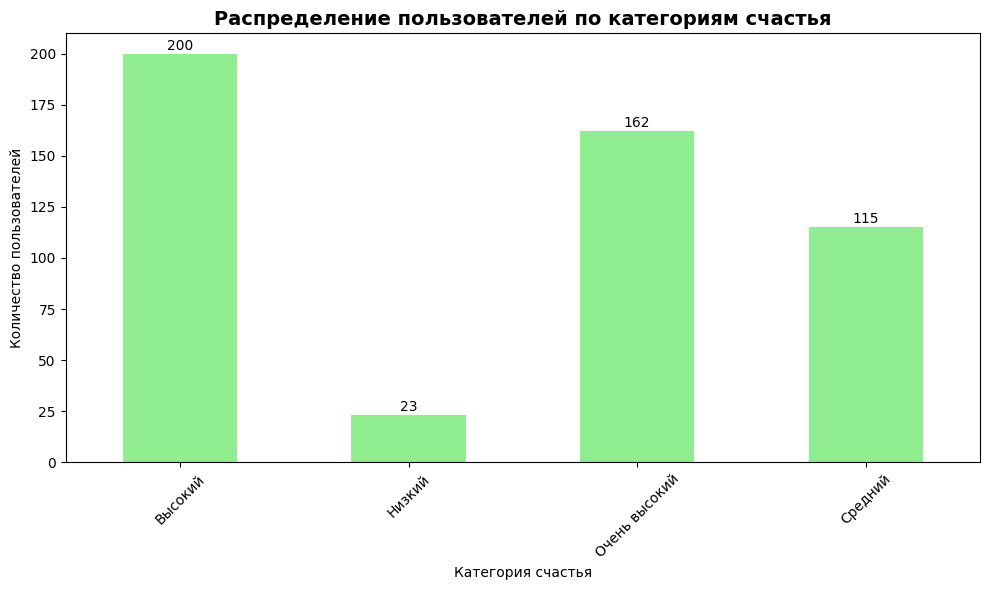

In [ ]:
# Создаем категории уровня счастья
def categorize_happiness(score):
    if score <= 5:
        return 'Низкий'
    elif 6 <= score <= 7:    # Явно указываем диапазон
        return 'Средний'
    elif 8 <= score <= 9:
        return 'Высокий'
    else:  # score == 10
        return 'Очень высокий'

df['Happiness_Category'] = df['Happiness_Index(1-10)'].apply(categorize_happiness)

# Визуализация
plt.figure(figsize=(10, 6))
df['Happiness_Category'].value_counts().sort_index().plot(kind='bar', color='lightgreen')
plt.title('Распределение пользователей по категориям счастья', fontsize=14, fontweight='bold')
plt.xlabel('Категория счастья')
plt.ylabel('Количество пользователей')
plt.xticks(rotation=45)
for i, v in enumerate(df['Happiness_Category'].value_counts().sort_index()):
    plt.text(i, v + 2, str(v), ha='center')
plt.tight_layout()
plt.show()

# **Выводы и рекомендации**


## **Ключевые выводы из анализа**


### **1. Влияние цифровых привычек на счастье**

1. **Время экрана (Daily_Screen_Time)** - один из наиболее важных факторов:
   - Прямая корреляция с уровнем стресса (r=0.74)
   - Обратная корреляция с качеством сна (r=-0.76)
   - Умеренное время за экраном способствует лучшему самочувствию

2. **Дни без социальных сетей** - слабая связь с уровнем счастья:
   - Полный отказ от соцсетей не гарантирует повышение счастья
   - Важнее качество использования, чем полное воздержание

3. **Выбор социальной платформы** - имеет определенное влияние:
   - Разные платформы могут по-разному влиять на пользователей
   - Требуется индивидуальный подход

### **2. Факторы образа жизни**

1. **Качество сна** - критически важный фактор:
   - Сильная связь с уровнем стресса (r=-0.58)
   - Прямо влияет на уровень счастья
   - Высокое качество сна → выше уровень счастья

2. **Уровень стресса** - ключевой индикатор:
   - Обратная связь с качеством сна
   - Прямая связь с временем экрана
   - Низкий стресс → более высокий уровень счастья

3. **Физическая активность** - умеренное влияние:
   - Более активные люди имеют тенденцию к более высокому уровню счастья
   - Регулярные упражнения улучшают общее самочувствие

### **3. Демографические факторы**

1. **Возраст** - минимальное влияние на уровень счастья в данной выборке
2. **Пол** - слабое влияние на предсказание уровня счастья


## **Заключение**

Проект успешно решает задачу предсказания уровня счастья на основе цифровых привычек и образа жизни.

**Основные достижения:**

✅ Проведен комплексный анализ данных с визуализацией ключевых паттернов  
✅ Выявлены важные корреляции между факторами (экранное время, сон, стресс)  
✅ Построены и сравнены 7 различных моделей машинного обучения  
✅ Достигнута точность предсказания с R² = 0.625 и MAE = 0.785  
✅ Определена важность признаков для интерпретации результатов  
✅ Разработаны практические рекомендации для улучшения уровня счастья  

**Ключевой вывод:**

Уровень счастья в значительной степени определяется балансом между цифровыми привычками и физическим/ментальным здоровьем. Качество сна, уровень стресса и управление экранным временем являются критическими факторами, которые можно контролировать для улучшения общего самочувствия.

**Практическая ценность:**

Полученные результаты могут быть использованы для:
- Разработки персональных рекомендаций по улучшению качества жизни
- Создания приложений для мониторинга цифрового баланса
- Информирования о важности управления цифровыми привычками
- Дальнейших исследований в области цифрового благополучия
